In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

conn = sqlite3.connect("../data/checking-logs.sqlite")

In [18]:
query = """
    SELECT timestamp, uid
    FROM checker
    WHERE uid LIKE 'user_%'
"""
df = pd.read_sql_query(query, conn)
conn.close()

In [19]:
# Convert time format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.day_name() 
df['hour'] = df['timestamp'].dt.hour          

In [20]:
# Counting commits by day of week and hour
heatmap_weekdays = df.groupby(['uid', 'weekday']).size().unstack(fill_value=0)
heatmap_hours = df.groupby(['uid', 'hour']).size().unstack(fill_value=0)

In [21]:
# Sort users by number of commits
heatmap_weekdays = heatmap_weekdays.loc[heatmap_weekdays.sum(axis=1).sort_values(ascending=False).index]
heatmap_hours = heatmap_hours.loc[heatmap_hours.sum(axis=1).sort_values(ascending=False).index]

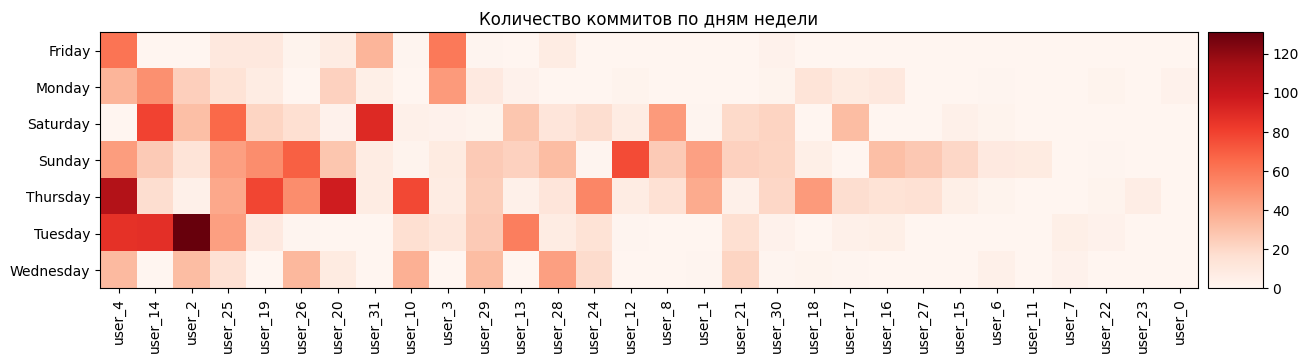

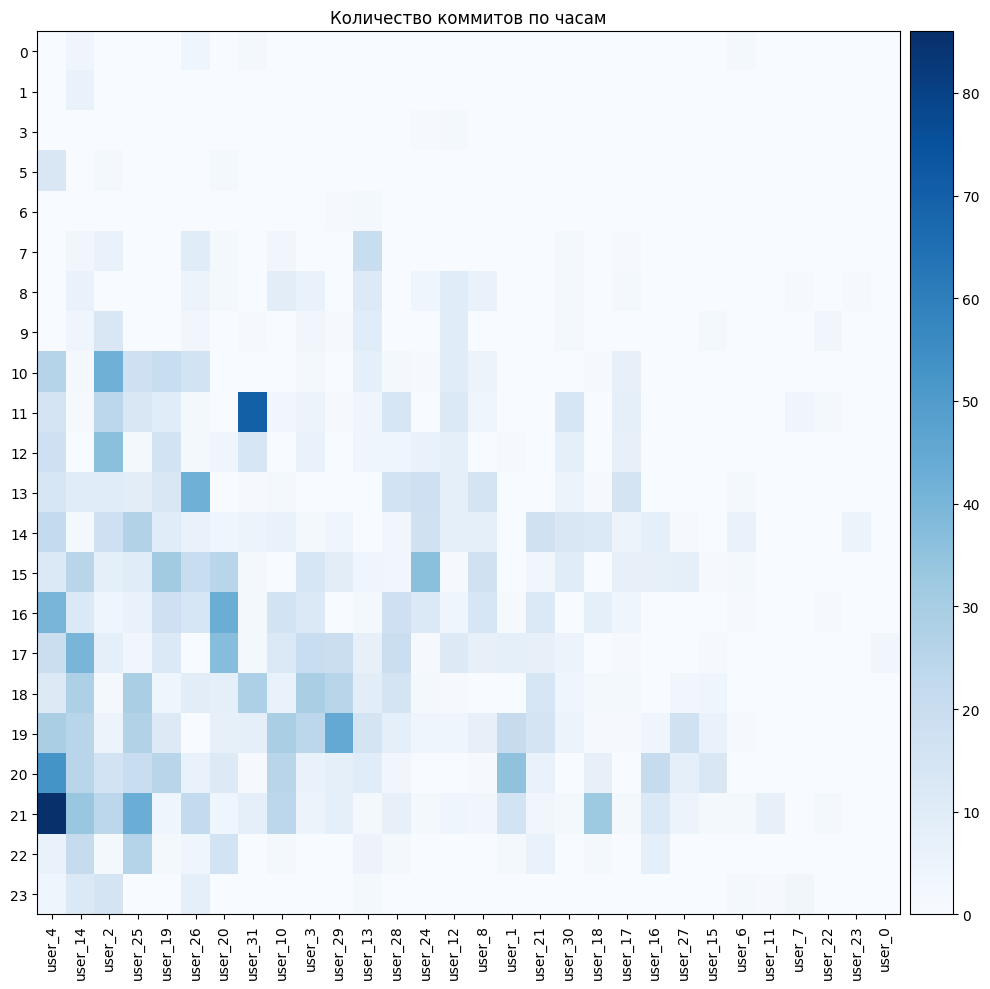

In [22]:
# Graph 1: Commits by day of the week
fig, ax1 = plt.subplots(figsize=(15, 8)) 
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)

im1 = ax1.imshow(heatmap_weekdays.T, cmap="Reds") 
plt.colorbar(im1, cax=cax1)
ax1.set_yticks(range(len(heatmap_weekdays.columns)))
ax1.set_yticklabels(heatmap_weekdays.columns)
ax1.set_xticks(range(len(heatmap_weekdays.index)))
ax1.set_xticklabels(heatmap_weekdays.index, rotation=90)
ax1.set_title("Количество коммитов по дням недели")

# Graph 2: Commits by hour
fig, ax2 = plt.subplots(figsize=(10, 10))  
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

im2 = ax2.imshow(heatmap_hours.T, cmap="Blues", aspect="auto")  
plt.colorbar(im2, cax=cax2)
ax2.set_yticks(range(len(heatmap_hours.columns)))
ax2.set_yticklabels(heatmap_hours.columns)
ax2.set_xticks(range(len(heatmap_hours.index)))
ax2.set_xticklabels(heatmap_hours.index, rotation=90)
ax2.set_title("Количество коммитов по часам")

plt.tight_layout()
plt.show()

In [6]:
conn.close()